In [2]:
from pandas_lib.std_imports import *
from Server_Cleaning.modules.Assignment_datasets import *
path = '../'

# Introduction
In this document, we want to perform analyses that provide information about football clubs. 
We will pay particular attention to the average goals scored/conceded per match.

In [3]:
# Getting and cleaning the DataFrames
clubs = get_clubs(path)
clubs = clubs.drop(columns=['total_market_value', 'club_code', 'url'])  # market_value is null
clubs['net_transfer_record'] = clubs['net_transfer_record'].astype('string')
clubs['net_transfer_record'] = (clubs['net_transfer_record'].apply(clean_net_records)).astype('int')
clubs['name'] = clubs['name'].astype('string')
clubs['coach_name'] = clubs['coach_name'].astype('string')
clubs['name'] = clubs['name'].str.replace('"', "'", regex=False)
clubs['name'] = clubs['name'].str.replace('Football Club', "FC", regex=False)
clubs['domestic_competition_id'] = clubs['domestic_competition_id'].astype('string')
clubs.fillna({'foreigners_percentage': 0}, inplace=True)
clubs['foreigners_percentage'] = clubs['foreigners_percentage'].astype('int')
clubs['stadium_name'] = clubs['stadium_name'].astype('string')
clubs.at[409, 'stadium_seats'] = 4851  # correcting the only 0 value!

In [4]:
club_games = get_club_games(path)
games = get_games(path)

# Generation of a correlation matrix
correl_matrix = clubs.corr(numeric_only=True)    # "clubs.corr()" is used to create the correlation matrix

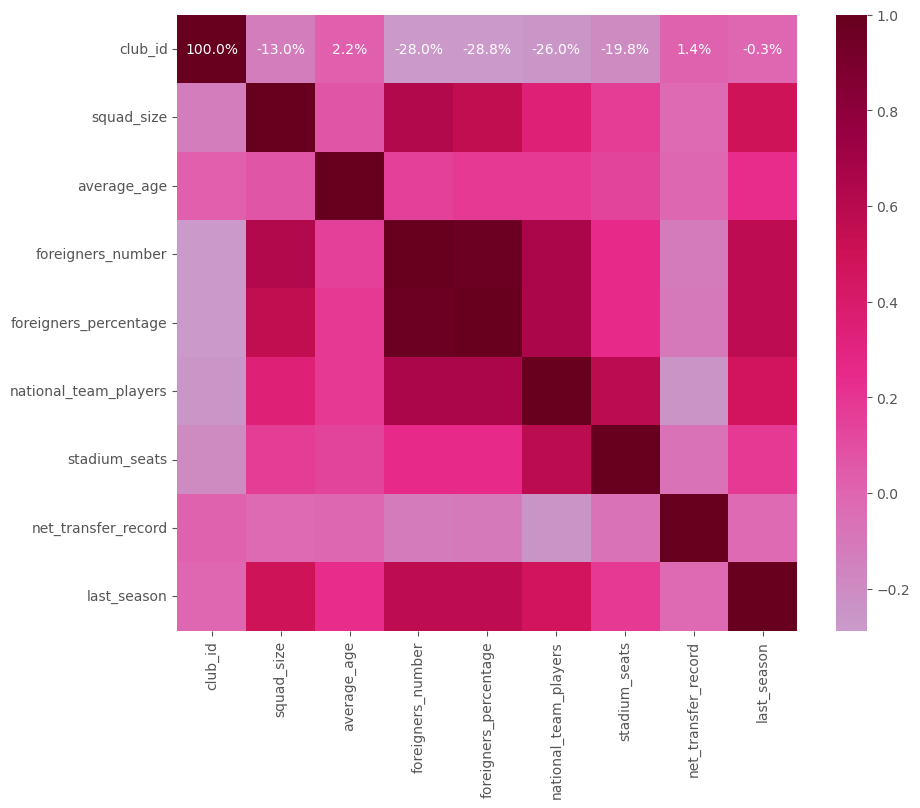

In [9]:
# Showing the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correl_matrix, cmap='PuRd', center=0, annot=True, fmt='.1%')
plt.show()